In [ ]:
# Import and setup

import os
import shutil
from pathlib import Path
from zolltools.nemsis import locationcodes

In [ ]:
# Create temporary setup

storage_dir = Path().cwd().joinpath(locationcodes.STORAGE_FOLDER_NAME)
storage_dir.mkdir()
temp_file_name = "suggested.json"
test_data_file_path = Path().cwd().joinpath("test_locationcodes", temp_file_name)
temp_data_file_path = storage_dir.joinpath(temp_file_name)
_ = shutil.copy(test_data_file_path, temp_data_file_path)

In [ ]:
# Get the grouping and confirm validity

suggested_grouping = locationcodes.get_grouping("suggested")
assert suggested_grouping["grouping"][0]["groupName"] == "commercial"

In [ ]:
# Remove temporary files

os.remove(temp_data_file_path)
storage_dir.rmdir()

## Temporary testing

In [ ]:
import time
import importlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from zolltools.nemsis import locationcodes

def get_measurements_for_trial(number_of_reads) -> list:
    importlib.reload(locationcodes)
    measurements = []
    for _ in range(number_of_reads):
        start_time = time.perf_counter_ns()
        _ = locationcodes.get_mapping()
        end_time = time.perf_counter_ns()
        measurements.append(end_time - start_time)
    return measurements

def get_measurements(number_of_trials=10, number_of_reads=1_000_000) -> np.ndarray:
    data = np.zeros((number_of_trials, number_of_reads))
    for trial in range(number_of_trials):
        data[trial] = get_measurements_for_trial(number_of_reads)
    return data

In [ ]:
df = pd.DataFrame(get_measurements(number_of_trials=100, number_of_reads=100_000))
means = df.mean(axis=0)

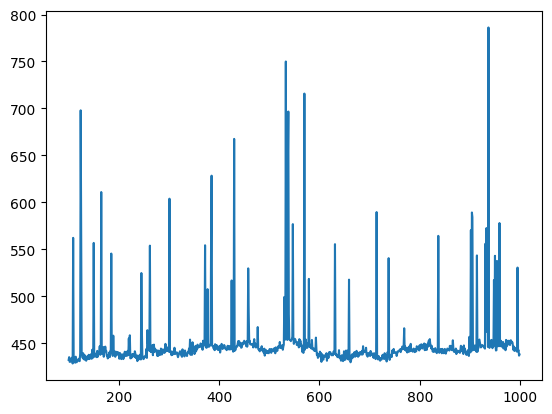

In [61]:
fig, ax = plt.subplots()
ax = means[100:1000].plot.line()